# Exercício

# Regressão

**Exercício: Prever o preço dos diamantes**

**Arquivo diamonds.csv**

KNN:
1. Testar outros valores de k e outras métricas de distância
2. Rodar o KNN apenas utilizando os atributos que estão altamente correlacionados com o preço

Regressão Linear:
1. Testar a predição utilizando o modelo de regressão linear (`LinearRegression`)

# Classificação

**Exercício: Classificação de Câncer**

**Arquivo wisconsin_breast_cancer.csv**

**Passos:**

1. Carregue o conjunto de dados em um DataFrame usando a biblioteca pandas.
2. Explore e visualize os dados para entender suas características.
3. Divida os dados em recursos (X) e rótulos (y).
4. Divida o conjunto de dados em conjuntos de treinamento e teste.
   
5. Caso use árvore de decisão:
   1. Importe a classe `DecisionTreeClassifier` da biblioteca scikit-learn.
   2. Inicialize o modelo de árvore de decisão.
   3. Treine o modelo usando o conjunto de treinamento.
   4. Faça previsões usando o conjunto de teste.
   5. Avalie o desempenho do modelo usando métricas como acurácia, matriz de confusão, etc.
   6.  Visualize a árvore de decisão resultante (opcional).
   
6. Caso use KNN:
   1. Importe a classe `KNeighborsClassifier` da biblioteca scikit-learn.
   2. Inicialize o modelo k-NN com um valor de k desejado.
   3. Treine o modelo usando o conjunto de treinamento.
   4. Faça previsões usando o conjunto de teste.
   5. Avalie o desempenho do modelo usando métricas como acurácia, matriz de confusão, etc.
   6. Experimente diferentes valores de k e avalie como eles afetam o desempenho.

# Interprete

**Exercício: Faça a predição indicando se o paciente tem diabetes (Outcome = 1) ou não (Outcome = 0).**

**Arquivo diabetes.csv**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.model_selection import train_test_split
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import DistanceMetric, mean_squared_error,mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.cluster import KMeans
from sklearn import tree
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


# Regressão

In [97]:
df = pd.read_csv('../../Datasets/diamonds.csv', sep = ",", low_memory=False)
#removendo os ids
df = df.drop(df.columns[0], axis=1)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [98]:
# label encoder
le = preprocessing.LabelEncoder()
for column in df.columns:
    if(df[column].dtypes=='object'):
        df[column] = le.fit_transform(df[column])
        
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [99]:
# Correlçação
df.drop_duplicates(keep='first',inplace=True) 
corr = df.corr()
corr

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.017785,0.291019,-0.214068,0.027861,0.181091,0.921548,0.975380,0.951908,0.953542
cut,0.017785,1.000000,0.000393,0.028141,-0.193184,0.150366,0.040196,0.022592,0.027805,0.002442
color,0.291019,0.000393,1.000000,-0.028002,0.047572,0.026102,0.171825,0.269876,0.263153,0.267825
clarity,-0.214068,0.028141,-0.028002,1.000000,-0.053165,-0.088074,-0.071218,-0.225575,-0.217459,-0.224117
depth,0.027861,-0.193184,0.047572,-0.053165,1.000000,-0.297669,-0.011048,-0.025348,-0.029389,0.094757
table,0.181091,0.150366,0.026102,-0.088074,-0.297669,1.000000,0.126566,0.194855,0.183231,0.150270
price,0.921548,0.040196,0.171825,-0.071218,-0.011048,0.126566,1.000000,0.884504,0.865395,0.861208
x,0.975380,0.022592,0.269876,-0.225575,-0.025348,0.194855,0.884504,1.000000,0.974592,0.970686
y,0.951908,0.027805,0.263153,-0.217459,-0.029389,0.183231,0.865395,0.974592,1.000000,0.951844
z,0.953542,0.002442,0.267825,-0.224117,0.094757,0.150270,0.861208,0.970686,0.951844,1.000000


### Separando o alvo (preço) dos atributos

In [100]:
target = pd.DataFrame(df, columns=["price"])

In [101]:
X = df.drop(df.columns[6], axis=1)
y = target

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Regressão Linear

In [104]:
from sklearn.linear_model import LinearRegression

#Criando objeto de regressão
lr = LinearRegression()

#Treinando regressão
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [105]:
value_pred = lr.predict(X_test) 

In [106]:
def results_regression(y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    print(f"mse: {mse}")
    rmse = math.sqrt(mse)
    print(f"rmse: {rmse}")
    mae = mean_absolute_error(y_test,y_pred)
    print(f"mae: {mae}")
    mape = mean_absolute_percentage_error(y_test,y_pred)
    print(f"mape: {mape}")
    r2 = r2_score(y_test,y_pred)
    print(f"r2_score {r2}")


In [108]:
results_regression(y_test, value_pred)

mse: 1873968.8605330877
rmse: 1368.9298230855693
mae: 879.5494551718109
mape: 0.3877366297170795
r2_score 0.8827630924488556


### KNN

In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 5, algorithm='auto')
model_KNN = knn.fit(X_train, y_train)
y_pred = model_KNN.predict(X_test)

In [110]:
results_regression(y_test, y_pred)

mse: 838375.0304749513
rmse: 915.6282162946658
mae: 481.39801096756196
mape: 0.134245981529335
r2_score 0.9475506247670414


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X[['carat', 'x', 'y', 'z']], y, test_size = 0.2, random_state = 0)
knn = neighbors.KNeighborsRegressor(n_neighbors = 5, algorithm='auto')
model_KNN = knn.fit(X_train, y_train)
y_pred = model_KNN.predict(X_test)
results_regression(y_test, y_pred)

mse: 2131210.3489952595
rmse: 1459.866551776312
mae: 831.1038758248908
mape: 0.2116022102715784
r2_score 0.8666698706049349


# Classificação

In [112]:
# Carregar o conjunto de dados
df = pd.read_csv("../../Datasets/wisconsin_breast_cancer.csv")
# 0 for benign, 1 for malignant
df.drop('id', axis = 1, inplace=True)
df

,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,0
695,2,1,1,1,2,1.0,1,1,1,0
696,5,10,10,3,7,3.0,8,10,2,1
697,4,8,6,4,3,4.0,10,6,1,1


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   thickness  699 non-null    int64  
 1   size       699 non-null    int64  
 2   shape      699 non-null    int64  
 3   adhesion   699 non-null    int64  
 4   single     699 non-null    int64  
 5   nuclei     683 non-null    float64
 6   chromatin  699 non-null    int64  
 7   nucleoli   699 non-null    int64  
 8   mitosis    699 non-null    int64  
 9   class      699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [114]:
df.duplicated().sum()

236

In [115]:
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

In [116]:
df.isna().sum().sum()

14

In [117]:
df.dropna(inplace=True)
df.isna().sum().sum()

0

In [118]:
df['class'].value_counts()

class
1    236
0    213
Name: count, dtype: int64

In [119]:
# Dividir em recursos (X) e rótulos (y)
X = df.drop('class', axis = 1)
y = df['class']

In [121]:
# Dividir em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
# Inicializar o modelo k-NN
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Treinar o modelo
knn.fit(X_train, y_train)

# Fazer previsões
y_pred = knn.predict(X_test)

In [123]:
# Avaliar o desempenho
def results(y_test,y_pred):
    results = confusion_matrix(y_test, y_pred)
    print ('Confusion Matrix :')
    print(results)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print ('Report : ')
    print (classification_report(y_test, y_pred))

In [124]:
results(y_test,y_pred)

Confusion Matrix :
[[47  2]
 [ 2 39]]
Accuracy: 95.56%
Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        49
           1       0.95      0.95      0.95        41

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



In [125]:
def computeClassificationDecisionTree(X_train, X_test, y_train, y_test,printResults):
    
    arvore_classificacao = tree.DecisionTreeClassifier()
    arvore_classificacao.fit(X_train,y_train)
    y_pred = arvore_classificacao.predict(X_test)
    if printResults:
        results(y_test, y_pred)
    return y_pred,arvore_classificacao

In [126]:
y_pred,arvore_classificacao = computeClassificationDecisionTree(X_train, X_test, y_train, y_test, True)

Confusion Matrix :
[[45  4]
 [ 3 38]]
Accuracy: 92.22%
Report : 
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        49
           1       0.90      0.93      0.92        41

    accuracy                           0.92        90
   macro avg       0.92      0.92      0.92        90
weighted avg       0.92      0.92      0.92        90



In [127]:
dot_data = tree.export_graphviz(arvore_classificacao, out_file=None, 
                      feature_names=X_train.columns,  
                      class_names=['benigno', 'maligno'],  
                      filled=True, rounded=True,  
                      special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render("arvore")

'arvore.pdf'

In [ ]:
# Interpretação

In [128]:
# -------------------------------
# 1. Carregar Dataset
# -------------------------------
data = pd.read_csv("../../Datasets/diabetes.csv")

In [129]:
# -------------------------------
# 2. Análise Exploratória
# -------------------------------
print("===== Informações do Dataset =====")
print(data.info())

print("\n===== Primeiras linhas =====")
data.head()



===== Informações do Dataset =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

===== Primeiras linhas =====


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [130]:
print("\n===== Estatísticas Descritivas =====")
data.describe()


===== Estatísticas Descritivas =====


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [131]:

print("\n===== Verificação de valores nulos =====")
data.isnull().sum().sum()



===== Verificação de valores nulos =====


0

In [ ]:
print("\n===== Verificação de duplicados =====")
print("Duplicados:", data.duplicated().sum())


===== Verificação de duplicados =====
Duplicados: 0


In [133]:
# Matriz de correlação
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

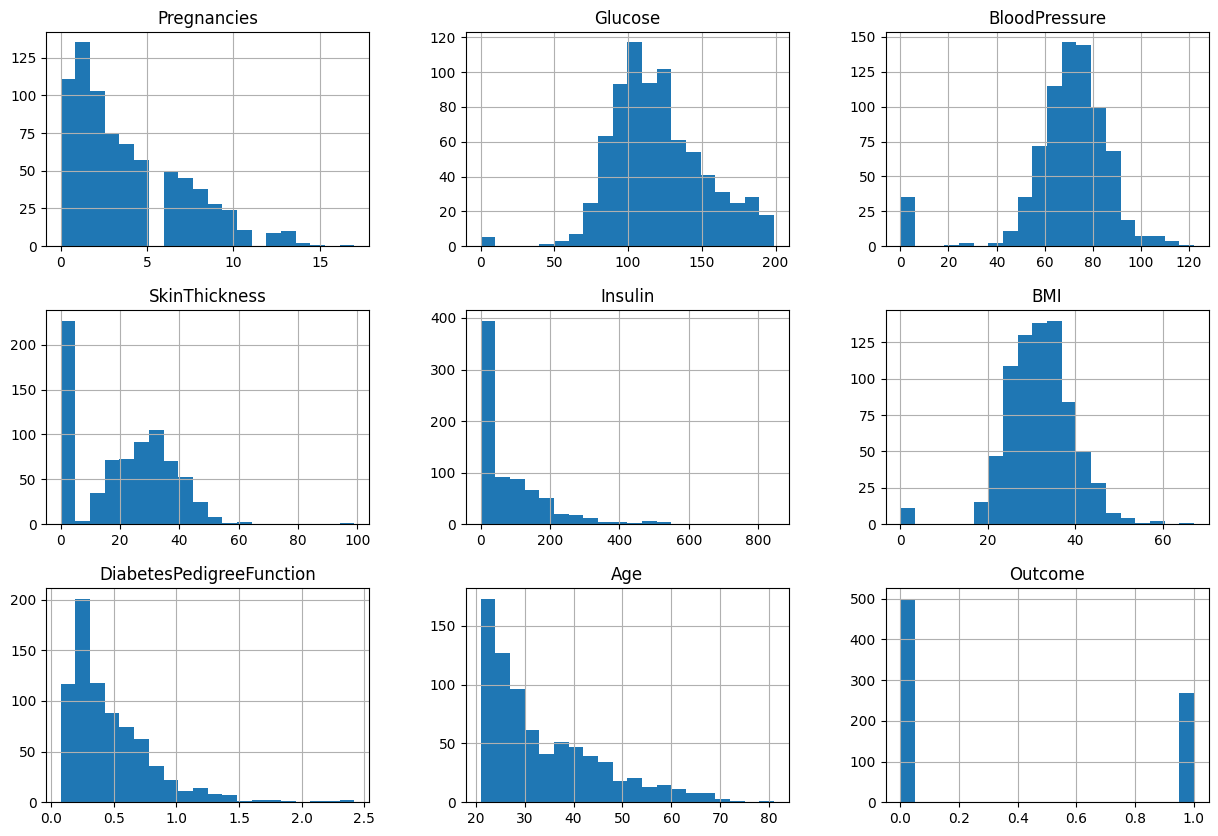

In [134]:
data.hist(bins=20, figsize=(15, 10))

In [135]:
# -------------------------------
# 3. CLASSIFICAÇÃO
# -------------------------------
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modelo 1: KNeighborsClassifier
clf1 = KNeighborsClassifier()
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)

In [138]:
y_pred,arvore_classificacao = computeClassificationDecisionTree(X_train, X_test, y_train, y_test, True)

Confusion Matrix :
[[76 23]
 [16 39]]
Accuracy: 74.68%
Report : 
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        99
           1       0.63      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [139]:
print("=== CLASSIFICAÇÃO ===")
print("KNeighborsClassifier:")
print("Acurácia:", accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

=== CLASSIFICAÇÃO ===
KNeighborsClassifier:
Acurácia: 0.6623376623376623
[[70 29]
 [23 32]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73        99
           1       0.52      0.58      0.55        55

    accuracy                           0.66       154
   macro avg       0.64      0.64      0.64       154
weighted avg       0.67      0.66      0.67       154



In [141]:
print("DecisionTree Classifier:")
print("Acurácia:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

DecisionTree Classifier:
Acurácia: 0.7467532467532467
[[76 23]
 [16 39]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80        99
           1       0.63      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

